In [7]:
import arch
import pandas as pd

In [8]:
from arch import arch_model


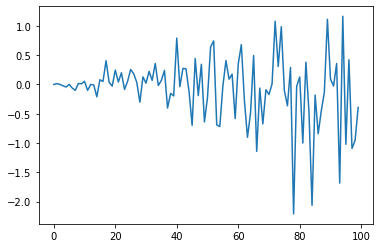

In [9]:
# create a simple white noise with increasing variance
from random import gauss
from random import seed
from matplotlib import pyplot
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# plot
pyplot.plot(data)
pyplot.show()

In [10]:

df = pd.DataFrame(data, columns = ["data"])
df.head()


,data
0,0.000000
1,0.014494
2,0.001327
3,-0.022936
4,-0.043687


In [11]:
from pmdarima import auto_arima

# Fit auto_arima function 
stepwise_fit = auto_arima(df['data'], start_p = 1, start_q = 1,
                          max_p = 4, max_q = 4, m = 4,
                          start_P = 0, seasonal = True,
                          d = 1, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[4]             : AIC=inf, Time=0.93 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=317.150, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=246.143, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=278.009, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=232.207, Time=0.09 sec
 ARIMA(1,1,0)(2,1,1)[4]             : AIC=inf, Time=0.65 sec
 ARIMA(1,1,0)(1,1,1)[4]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(2,1,0)[4]             : AIC=266.163, Time=0.05 sec
 ARIMA(2,1,0)(2,1,0)[4]             : AIC=224.896, Time=0.09 sec
 ARIMA(2,1,0)(1,1,0)[4]             : AIC=228.558, Time=0.06 sec
 ARIMA(2,1,0)(2,1,1)[4]             : AIC=inf, Time=0.39 sec
 ARIMA(2,1,0)(1,1,1)[4]             : AIC=inf, Time=0.30 sec
 ARIMA(3,1,0)(2,1,0)[4]             : AIC=224.124, Time=0.11 sec
 ARIMA(3,1,0)(1,1,0)[4]             : AIC=230.402, Time=0.07 sec
 ARIMA

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                  100
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 -92.828
Date:                Tue, 03 Aug 2021   AIC                            193.655
Time:                        10:37:22   BIC                            204.036
Sample:                             0   HQIC                           197.855
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8678      0.103     -8.418      0.000      -1.070      -0.666
ar.L2         -0.4607      0.131     -3.530      0.000      -0.717      -0.205
ar.L3         -0.1217      0.083     -1.459      0.1

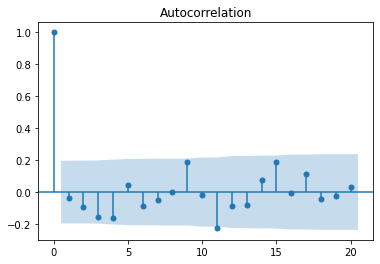

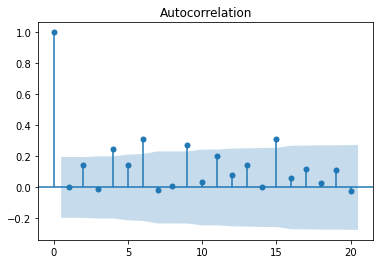

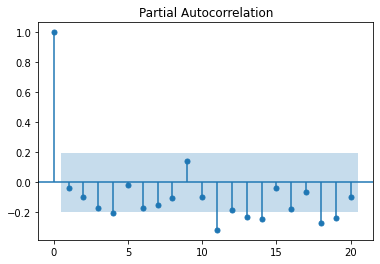

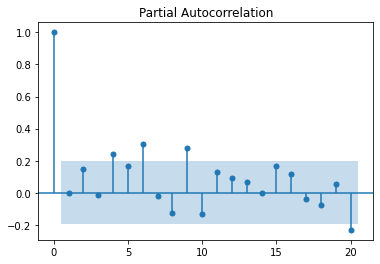

In [13]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df.data, order=(3,1,0))
model_fit = model.fit()
print(model_fit.summary())
resids = model_fit.resid

import statsmodels.api as sm
sm.graphics.tsa.plot_acf(resids);
sm.graphics.tsa.plot_acf(resids**2);

sm.graphics.tsa.plot_pacf(resids);
sm.graphics.tsa.plot_pacf(resids**2);


Iteration:      1,   Func. Count:      4,   Neg. LLF: 155.71856183898373
Iteration:      2,   Func. Count:     10,   Neg. LLF: 85.60009822424908
Iteration:      3,   Func. Count:     14,   Neg. LLF: 85.53185657385922
Iteration:      4,   Func. Count:     17,   Neg. LLF: 85.53120823338706
Iteration:      5,   Func. Count:     20,   Neg. LLF: 85.53120535551179
Iteration:      6,   Func. Count:     22,   Neg. LLF: 85.53120535552539
Optimization terminated successfully    (Exit mode 0)
            Current function value: 85.53120535551179
            Iterations: 6
            Function evaluations: 22
            Gradient evaluations: 6
                        Zero Mean - ARCH Model Results                        
Dep. Variable:                   data   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.010
Vol Model:                       ARCH   Log-Likelihood:               -85.5312
Distribution:                  Normal   AIC:

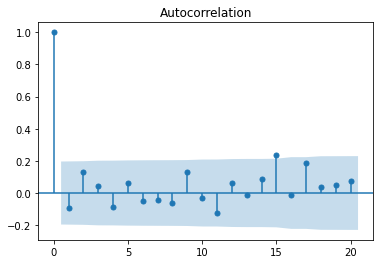

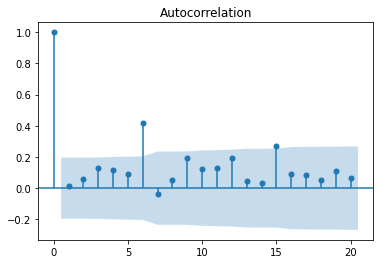

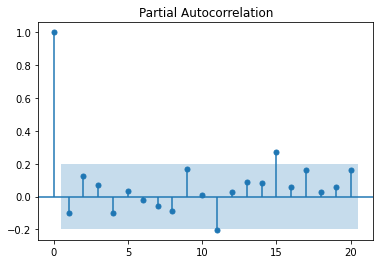

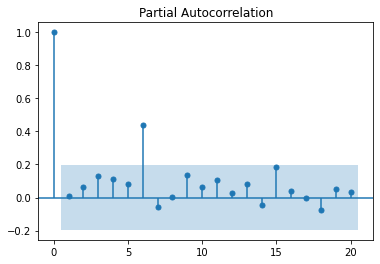

In [14]:
from arch import arch_model
model = arch_model(df.data, mean='Zero', vol='ARCH', p=1)
x = model.fit()
print(x.summary())
x.resid
sm.graphics.tsa.plot_acf(x.resid);
sm.graphics.tsa.plot_acf(x.resid**2);

sm.graphics.tsa.plot_pacf(x.resid);
sm.graphics.tsa.plot_pacf(x.resid**2);



Iteration:      1,   Func. Count:      7,   Neg. LLF: 67017.58163994076
Iteration:      2,   Func. Count:     14,   Neg. LLF: 69.47795384948869
Iteration:      3,   Func. Count:     21,   Neg. LLF: 56.198948599775335
Iteration:      4,   Func. Count:     28,   Neg. LLF: 58.22462276349475
Iteration:      5,   Func. Count:     35,   Neg. LLF: 120.6909523886211
Iteration:      6,   Func. Count:     42,   Neg. LLF: 55.831802253127
Iteration:      7,   Func. Count:     49,   Neg. LLF: 53.24036268059571
Iteration:      8,   Func. Count:     55,   Neg. LLF: 53.20425895583179
Iteration:      9,   Func. Count:     62,   Neg. LLF: 52.52747292124986
Iteration:     10,   Func. Count:     68,   Neg. LLF: 52.2344297776775
Iteration:     11,   Func. Count:     74,   Neg. LLF: 51.563124440084245
Iteration:     12,   Func. Count:     80,   Neg. LLF: 51.20311979523937
Iteration:     13,   Func. Count:     86,   Neg. LLF: 51.18834510021806
Iteration:     14,   Func. Count:     92,   Neg. LLF: 51.18448923

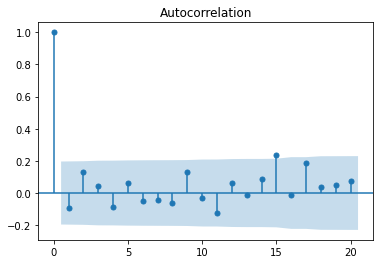

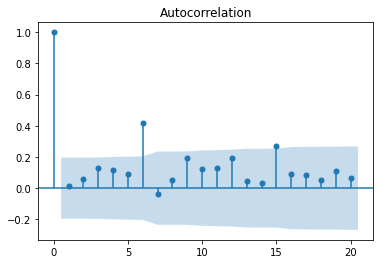

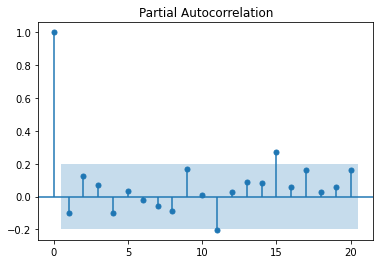

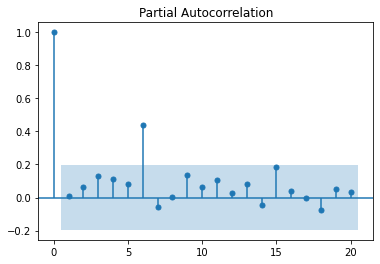

In [16]:
model = arch_model(df.data, mean='Zero', vol='GARCH', p=2,q=2)
x = model.fit()
print(x.summary())
x.resid
x.aic
sm.graphics.tsa.plot_acf(x.resid);
sm.graphics.tsa.plot_acf(x.resid**2);

sm.graphics.tsa.plot_pacf(x.resid);
sm.graphics.tsa.plot_pacf(x.resid**2);


Garch has better AIC than Arch

In [17]:
# tests
# Engle’s ARCH test assesses the null hypothesis that a series of residuals (rt) 
# exhibits no conditional heteroscedasticity (ARCH effects), 
# against the alternative that an ARCH(L) model describes the series.

from statsmodels.stats.diagnostic import het_arch
archtest = het_arch(x.resid)
print('p value is :',archtest[1])


p value is : 0.03511716797285511


c:\users\satish\appdata\local\programs\python\python39\lib\site-packages\statsmodels\stats\diagnostic.py:657: FutureWarning: The default value of nlags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setmaxlags or period to silence this warning.
  warnings.warn("The default value of nlags is changing.  After 0.12, "
